# $\partial_i\alpha$ plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams['figure.figsize'] = [9, 9]

font_size = 20

## Data

In [2]:
columns=["x", "y", "z", "dx", "dy", "dz"]

file_root = "../../Release/"
config_file_name = "grlensing_config.yaml"
metric_name = "Superimposed Kerr binary in Kerr-Schild coordinates"
component_name = "grad_lapse"
file_format = ".ascii"

file_count = 10

# Load first
file_idx = "0"
file_path = file_root + metric_name + "_" + component_name + "_" + file_idx + file_format
data = np.genfromtxt(file_path)
df = pd.DataFrame(data, columns=columns)

# Load the rest
for idx in range(1, file_count):
    file_idx = str(idx)
    file_path = file_root + metric_name + "_" + component_name + "_" + file_idx + file_format
    data = np.genfromtxt(file_path)
    df = pd.merge(df, pd.DataFrame(data, columns=columns), how="outer")
    
df.sort_values(["x", "y", "z"]);

## Selecting a plot point

In [3]:
# Pick a y-z value
filtered_df = df.loc[((df["y"] == 0.0) & (df["z"] == 0.0))]

## Plots

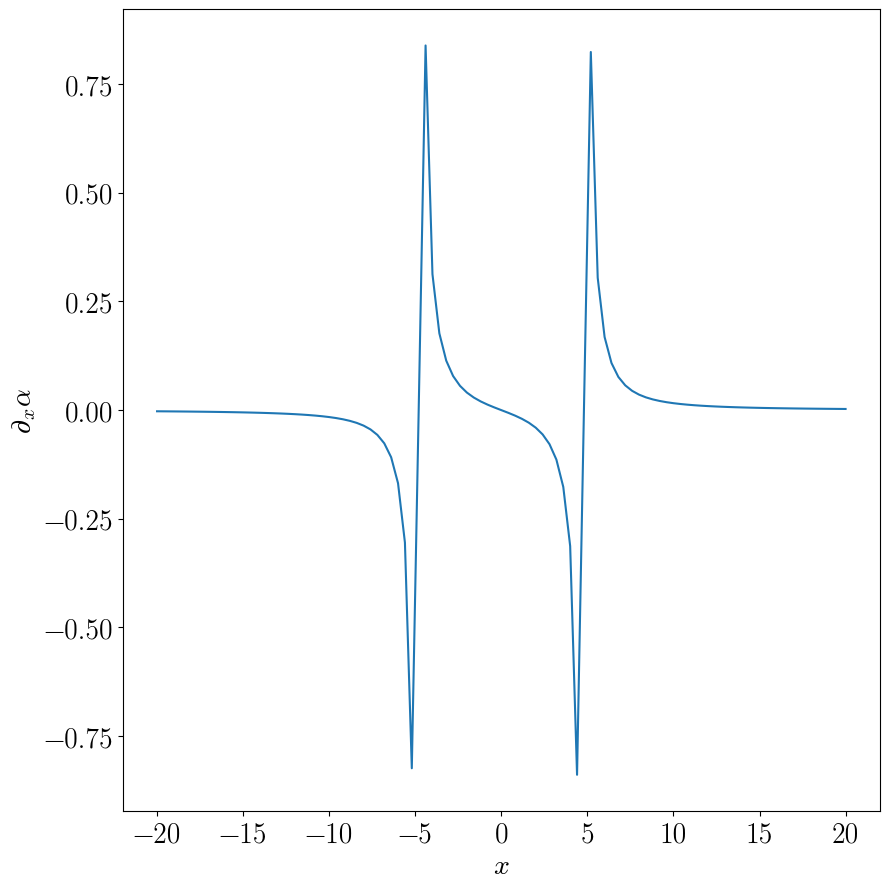

In [4]:
plt.close("all")
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.xlabel("$x$", fontsize = font_size)
plt.ylabel("$\\partial_x\\alpha$", fontsize = font_size)
plt.plot(filtered_df["x"], filtered_df["dx"])
plt.tight_layout()
plt.show()

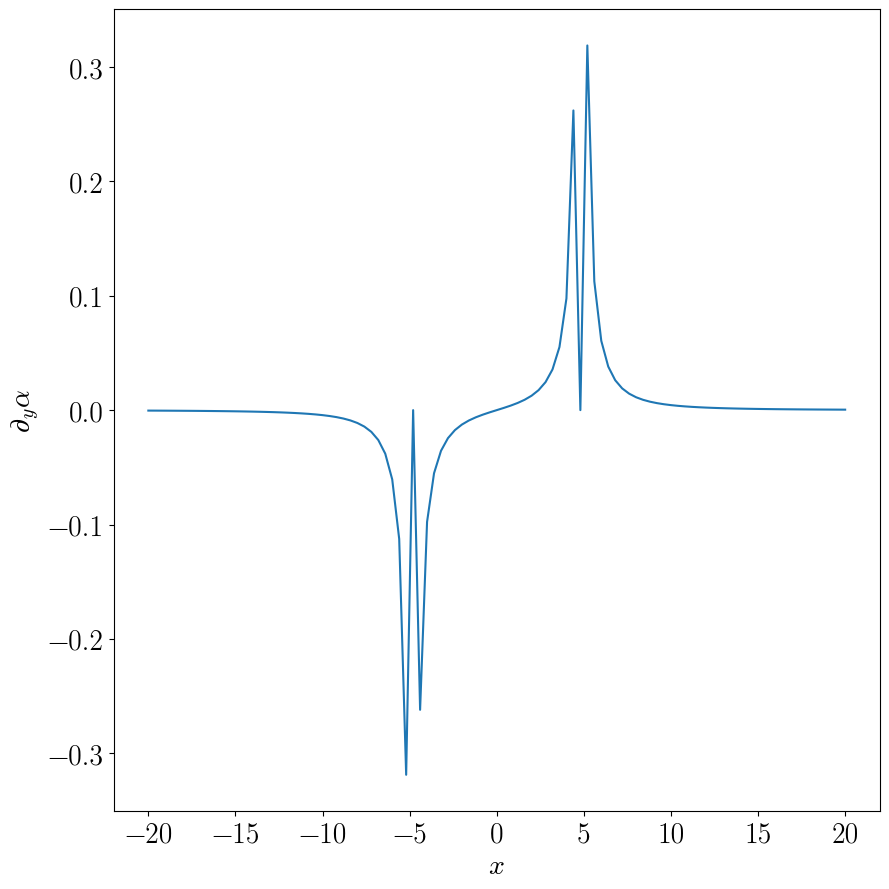

In [7]:
plt.close("all")
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.xlabel("$x$", fontsize = font_size)
plt.ylabel("$\\partial_y\\alpha$", fontsize = font_size)
plt.plot(filtered_df["x"], filtered_df["dy"])
plt.tight_layout()
plt.show()

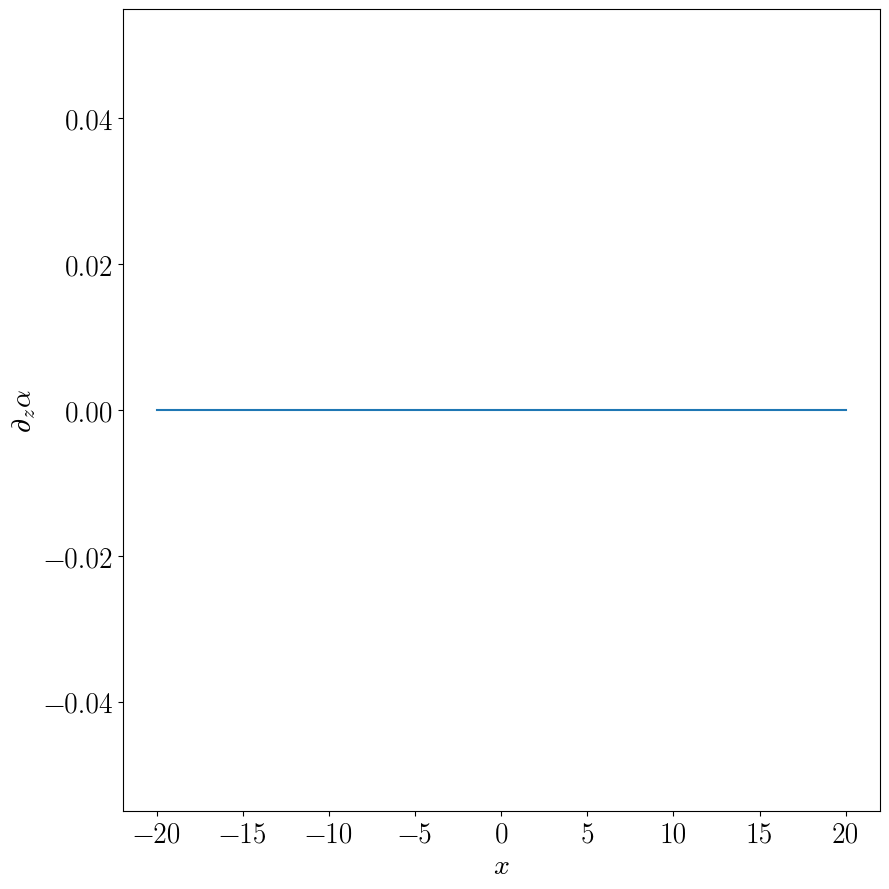

In [8]:
plt.close("all")
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.xlabel("$x$", fontsize = font_size)
plt.ylabel("$\\partial_z\\alpha$", fontsize = font_size)
plt.plot(filtered_df["x"], filtered_df["dz"])
plt.tight_layout()
plt.show()